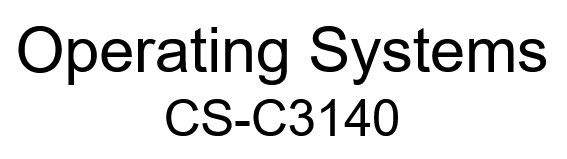

#Assignment 9 (Bonus): Threads and Synchronisation

**Note**: This assignment can be completed in a number of ways:
* Using this Google Colab notebook (please save your own copy and work on that, instructions below) <- easiest
* Using your own Linux machine (any distro)
* Using a Linux virtual machine (e.g. the TinyOS VM from Assignments 5-6)
* Over an SSH connection to [Aalto shell servers](https://www.aalto.fi/en/services/linux-shell-servers-at-aalto)

Please feel free to use the option that works best for you. Please enter the results in the [A+ platform](https://plus.cs.aalto.fi/accounts/login/?next=/os/2022/). For any questions please refer to the [Zulip chat of the OS course](https://operatingsystems.zulip.aalto.fi/).

**When compiling the code below, before making any of your edits, for gcc versions less than 9.5.0, you may see compilation warnings which you can safely ignore. It is not safe to ignore any other compilation warnings and compilation errors introduced by code added or edited by you.**

**Note**: If you are unsure how to use Google Colab for running code/scripts, please refer to `How to use Google Colab` section from Assignment 4 :
https://colab.research.google.com/drive/1X1xFIkDCyuQuiwv9RoKnWHh6xuCELzAj?usp=sharing#scrollTo=MvYnYMkSlc05



## Task 1: Multi-threaded C with PThreads

### PThreads

Write a C program that starts a variable number of threads. Each thread should print out the following message
```
"Hello World! from thread NR"
```
where NR is the identification number of the thread.

In the template below, replace each `TODO` line with the correct line of code.

For writing the pthreads program, you can use the following calls
* [pthread_create](https://man7.org/linux/man-pages/man3/pthread_create.3.html)
* [pthread_exit](https://man7.org/linux/man-pages/man3/pthread_exit.3.html)

In [ ]:
%%writefile pthread.c

// TODO 0: Include required headers
// ...
 
//The maximum number of threads
#define NUM_THREADS 5

// TODO 1: Define the print function with the correct return type (replace ...)
... PrintHello(void *threadid)
{
  int tid;
  tid = (int)threadid;
  
  printf("Hello World! It's me, thread #%d!\n", tid);
  // TODO 2: exit the thread (replace ...)
  // ...
}

int main (int argc, char *argv[])
{
  // array of thread handles
  pthread_t threads[NUM_THREADS];
  // create return code
  int rc;
  // thread counter
  int t;

	// launch the threads and note that the print order 
	// between MAIN and the threads is not deterministic
  for(t=0; t<NUM_THREADS; t++){
      // TODO 3: Create the thread (replace ...)
      // rc = ...
      if (rc){
        printf("ERROR; return code is %d\n", rc);
      } 
  } 
  
  // TODO 4: Exit the main thread (replace ...)
  // ...
} 

Overwriting pthread.c


In [ ]:
# Compiling the pthread code
!gcc -o pthread pthread.c -lpthread

In [ ]:
#Running the pthread code
!time ./pthread

## Task 2: More synchronisation - Mutexes, Semaphores

There are $N$ threads (processes) numbered from $0$ to $N-1$. All processes have access to a shared variable called `shared_var`, and the threads update the variable in rounds. An update round consists of the ordered sequence (thread $i$ writes before thread $i+1$) of write operations. For example, for $5$ threads and $2$ rounds, in round $1$ thread $3$ is writing the value $2$ to `shared_var`, and in round $1$ it is writing the value of $7$.

Implement with C++ the above procedure for a configurable number of threads and rounds by using `pthreads` and the following methods:
* mutexes and condition variables using the family of methods containing[pthread_mutex_lock](https://linux.die.net/man/3/pthread_mutex_lock) and [pthread_cond_wait](https://linux.die.net/man/3/pthread_cond_wait)
* semaphores using the family of methods containing [sem_wait](https://linux.die.net/man/3/sem_wait)

As the threads are updating the value of `shared_var`, these are storing the state of `shared_var` in a dynamically allocated array. After the number of update rounds is ending, that array is used to print the history of the values (below this the part after `Processing data...`). In the example below, `thread 1 [....] 00002:0011` means `thread 1 will update the value of shared_var at round 2 with the value of 11`.

The output of the running the methods should be of the following form
```
In main: creating thread 0
In main: creating thread 1
In main: creating thread 2
In main: creating thread 3
In main: creating thread 4
Hello World! mutex thread #4!
Hello World! mutex thread #0!
Hello World! mutex thread #3!
Hello World! mutex thread #2!
Hello World! mutex thread #1!
Processing data... nrthreads: 5 nrrounds: 10
thread   0: 00000:0000 00001:0005 00002:0010 00003:0015 00004:0020 00005:0025 00006:0030 00007:0035 00008:0040 00009:0045 
thread   1: 00000:0001 00001:0006 00002:0011 00003:0016 00004:0021 00005:0026 00006:0031 00007:0036 00008:0041 00009:0046 
thread   2: 00000:0002 00001:0007 00002:0012 00003:0017 00004:0022 00005:0027 00006:0032 00007:0037 00008:0042 00009:0047 
thread   3: 00000:0003 00001:0008 00002:0013 00003:0018 00004:0023 00005:0028 00006:0033 00007:0038 00008:0043 00009:0048 
thread   4: 00000:0004 00001:0009 00002:0014 00003:0019 00004:0024 00005:0029 00006:0034 00007:0039 00008:0044 00009:0049
```

**Notes**:
1. In the previous example `#4` refers to the thread-id `4`. Each thread has its own personalised welcome message that includes the thread-id.
2. For `mutex` and `semaphore` the first message that the threads are printing are `Hello World! mutex thread #4!` and `Hello World! semaphore thread #4!`.
3. The above example is for five threads and ten rounds, but the code should be general.

**Goals**
1. Implement the above program in this Colab. You can start from the `pthreads` lab exercise and augment that one with **three** methods such as ``hello_mutex` and `hello_semaphore`
2. You need to implement **three** scripts, one for each method. There will be three outputs for each type.


In [ ]:
%%writefile goparallel.c

#include <assert.h>
#include <pthread.h>
#include <stdlib.h>
#include <stdio.h>

#include <semaphore.h>
#include <sys/mman.h>
#include <sys/time.h>

#include <sys/resource.h>
#include <sched.h>
#include <math.h>

#include <errno.h>

#define NUM_THREADS 5
#define NUM_ROUNDS  10

volatile int shared_variable = 0;

long* time_stamps;
int* val_stamps;

inline long t_double_time() {
  struct timespec tv;
  clock_gettime(CLOCK_REALTIME, &tv);

  return tv.tv_nsec;
}

inline void store_stamps(int tid, int round, int shared_variable){
    val_stamps[tid * NUM_ROUNDS + round] = shared_variable;
    time_stamps[tid * NUM_ROUNDS + round] = t_double_time();
}

void print_rounds(){
    for(int i=0; i < NUM_THREADS; i++){
        printf("thread %3d: ", i);

        for(int j=0; j<NUM_ROUNDS; j++){
            printf("%.5d:%.4d ", j, val_stamps[i * NUM_ROUNDS + j]);
        }
        printf("\n");
    }
}

/*
  MUTEX SECTION
*/
pthread_mutex_t mutex = PTHREAD_MUTEX_INITIALIZER;
pthread_cond_t* cond_is_ok;

void *hello_mutex(void *threadid)
{
  long tid = (long)threadid;
  printf("Hello World! mutex thread #%ld!\n", tid);

  int local_var = (tid + 1) % NUM_THREADS;
  int ngh = (tid + 1) % NUM_THREADS;

  for(int i=0; i < NUM_ROUNDS; i++) {
    // TODO 5: Ensure no other thread can access the shared variable (replace ...)
    //pthread_ ... (&mutex)
    while(shared_variable % NUM_THREADS != tid){
      // TODO 6: Wait on the conditional variable (replace ...)
      //pthread_ ... (&cond_is_ok[tid], &mutex);
    }
    shared_variable = local_var;

    // TODO 7: Signal the conditional variable (replace ...)
    //pthread_ ... (&cond_is_ok[ ngh ]);
    // TODO 5: Allow other threads to access the shared variable (replace ...)
    //pthread_ ... (&mutex);

    store_stamps(tid, i, local_var);
    
    local_var += NUM_THREADS;
  }

  pthread_exit(NULL);
}

/*
  SEMAPHORE SECTION
*/
sem_t* semaphores;

void *hello_semaphore(void *threadid)
{
  long tid = (long)threadid;
  printf("Hello World! semaphore thread #%ld!\n", tid);

  int local_var =(tid + 1) % NUM_THREADS;

  for(int i=0; i < NUM_ROUNDS; i++) {

    // TODO 8: Wait (replace ...)
    //... (&semaphores[tid]);

    // update the variable in turns?
    shared_variable = local_var;

    store_stamps(tid, i, local_var);

    // TODO 8: Release (replace ...)
    //... (&semaphores[(tid + 1) % NUM_THREADS]);

    local_var += NUM_THREADS;
  }

  pthread_exit(NULL);
}

int main (int argc, char *argv[])
{
  //reinit the variable
  shared_variable = 0;

  int rc;
  long t;
  pthread_t threads[NUM_THREADS];
  semaphores = (sem_t*) malloc(NUM_THREADS * sizeof(sem_t));
 
  time_stamps = (long*) malloc(NUM_THREADS * NUM_ROUNDS * sizeof(double));
  val_stamps = (int*) malloc(NUM_THREADS * NUM_ROUNDS * sizeof(int));

  cond_is_ok = (pthread_cond_t*)malloc(NUM_THREADS * sizeof(pthread_cond_t));
  pthread_mutex_init(&mutex, NULL);
  for(t=0; t<NUM_THREADS; t++) {
    // TODO: 9 Initialise the semaphores and conditional variables
    // sem_init(...)
    // pthread_cond_init(...)
  }
  
  // TODO: 10 Start first thread by signalling the semaphore (replace ...)
  //sem_post(...);

  int run = 1;
  while(run != 0) {
    for (t = 0; t < NUM_THREADS; t++) {
      printf("In main: creating thread %ld\n", t);

      // TODO: 11 Launch a thread with one of the synchronisation methods:
      // mutex or semaphore
      //rc = pthread_create(&threads[t], NULL, ..., (void *)t);

      if (rc) {
        printf("ERROR; return code from pthread_create() is %d\n", rc);
        return -1;
      }
    }

    for (t = 0; t < NUM_THREADS; t++) {
      rc = pthread_join(threads[t], NULL);
      if (rc) {
        printf("ERROR; return code from pthread_join() is %d\n", rc);
        return -1;
      }
    }

    for (t = 0; t < NUM_THREADS; t++) {
      sem_destroy(&semaphores[t]);
      pthread_cond_destroy(&cond_is_ok[t]);
    }

    printf("Processing data... nrthreads: %d nrrounds: %d\n", NUM_THREADS, NUM_ROUNDS);
    print_rounds();
    
    run--;
  }

  free(time_stamps);

  /* Last thing that main() should do */
  pthread_exit(NULL);
}

Writing goparallel.c


In [ ]:
!g++ -std=c++11 -lm -pthread -Wall -o goparallel2 goparallel.c

In [ ]:
!./goparallel2